In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv("data/PA6_cleaned_dataset.csv")

In [5]:
data1 = data.copy()
data1['time'] = pd.to_datetime(data1['time'])
data1.set_index('time', inplace=True, drop=True)
data1.index.freq = 'MS'

data1.head()

,PA6 GLOBAL_ EMEAS _ EUR per TON,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,best_price_compound,Benzene_price,Caprolactam_price,Cyclohexane_price,Electricty_Price_France,Electricty_Price_Italy,Electricty_Price_Poland,Electricty_Price_Netherlands,Electricty_Price_Germany,Inflation_rate_france,Automotive Value
time,,,,,,,,,,,,,,,,,,,,
2015-01-01,1650,47.106667,48.07,45.98,47.27,2.9743,9.250000,16.187338,91.059105,NaN,659.63,1800,832.67,41.95,51.60,34.34,41.18,31.68,0.090000,100.663419
2015-02-01,1600,54.790000,57.93,55.83,50.61,2.8478,8.270000,14.203834,83.520263,NaN,591.18,1719,760.25,50.14,54.52,36.23,46.37,36.69,0.108333,103.107046
2015-03-01,1600,52.826667,55.79,54.91,47.78,2.8006,8.270000,13.041319,82.159499,NaN,584.15,1655,745.34,43.79,49.94,32.64,42.18,31.30,0.126667,123.581091
2015-04-01,1725,57.543333,59.39,58.80,54.44,2.5797,6.774446,10.936659,70.941309,NaN,727.69,1800,883.40,39.52,47.85,34.04,41.40,29.78,0.145000,114.066413
2015-05-01,1875,62.506667,64.56,63.69,59.27,2.8383,6.683997,9.336900,72.567769,NaN,912.53,2019,1073.00,26.46,47.27,39.07,37.34,25.33,0.163333,112.317699


(0.18579265890802288,
 -2.258232666434182,
 {'1%': -3.5097356063504983,
  '5%': -2.8961947486260944,
  '10%': -2.5852576124567475})

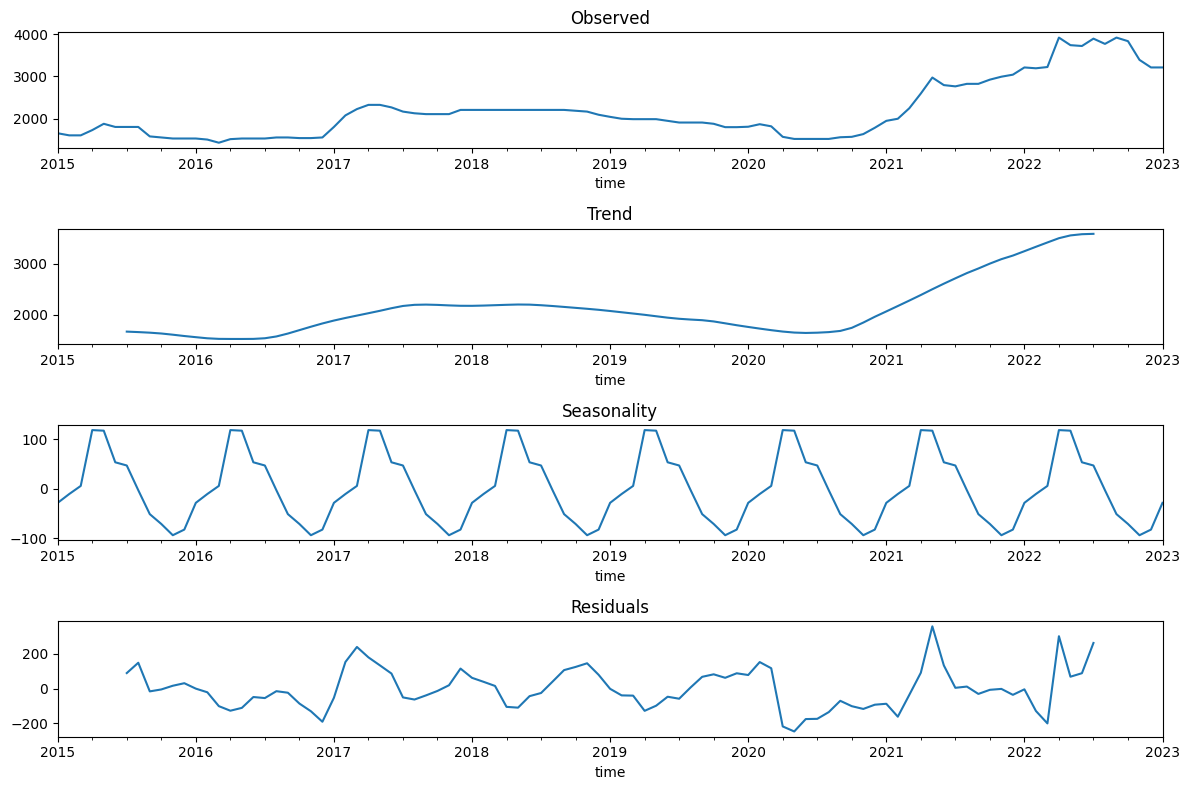

In [6]:
decomposition = seasonal_decompose(data1['PA6 GLOBAL_ EMEAS _ EUR per TON'], model='additive')

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals')
plt.tight_layout()

# Augmented Dickey-Fuller test
adf_test = adfuller(data1['PA6 GLOBAL_ EMEAS _ EUR per TON'])

# Extracting the p-value from the test results
adf_p_value = adf_test[1] #p value greater than 0.05, suggesting that the series is not stationary

adf_p_value, adf_test[0], adf_test[4]

In [7]:
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters

# Splitting the data into training and testing sets (let's use the last 12 months as test data)
train_data = data['PA6 GLOBAL_ EMEAS _ EUR per TON'][:-12]
test_data = data['PA6 GLOBAL_ EMEAS _ EUR per TON'][-12:]

sarima_model = SARIMAX(train_data, 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_model_fit = sarima_model.fit(disp=False)

sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PA6 GLOBAL_ EMEAS _ EUR per TON   No. Observations:                   85
Model:              SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.227
Date:                             Tue, 21 Nov 2023   AIC                            706.454
Time:                                     12:02:25   BIC                            716.756
Sample:                                          0   HQIC                           710.467
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3155      0.172      1.838      0.066      -0.021       0.652
ma.L1          0.2592      0.225      1.154      0.249      -0.181       0.699
ar.S.L12      -0.3992      0.228     -1.748      0.080      -0.847       0.048
ma.S.L12      -0.4833      0.223     -2.165      0.030      -0.921      -0.046
sigma2      9159.4085   1257.574      7.283      0.000    6694.609    1.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                14.95
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               5.12   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

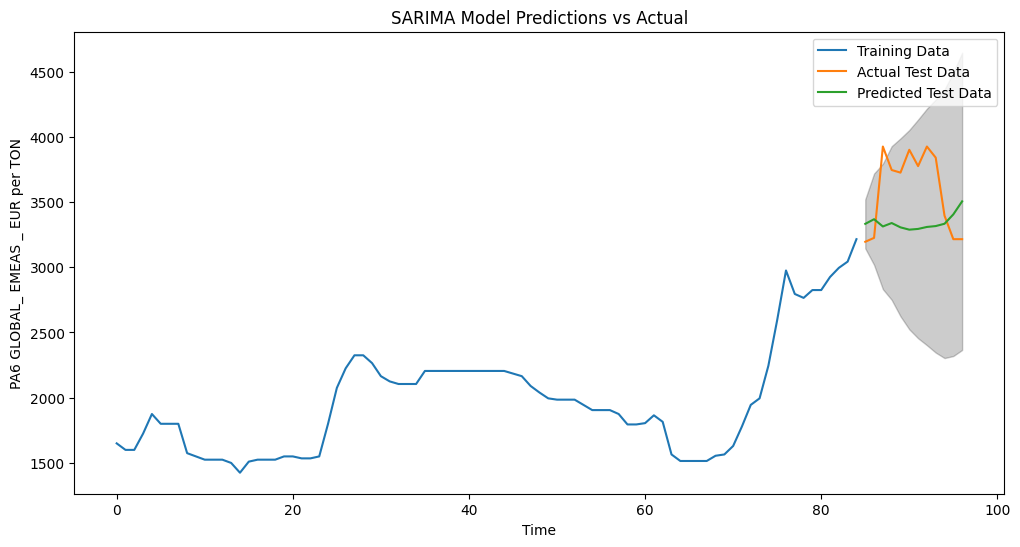

MAE is 374.58
RMSE is 422.42


In [8]:
predictions = sarima_model_fit.get_forecast(steps=12)
predicted_mean = predictions.predicted_mean
predicted_ci = predictions.conf_int()

# Calculating performance metrics
mae = mean_absolute_error(test_data, predicted_mean)
rmse = np.sqrt(mean_squared_error(test_data, predicted_mean))

# Plotting the predictions vs the actual values
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, label='Training Data')
sns.lineplot(data=test_data, label='Actual Test Data')
sns.lineplot(data=predicted_mean, label='Predicted Test Data')
plt.fill_between(predicted_ci.index, 
                 predicted_ci.iloc[:, 0], 
                 predicted_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('SARIMA Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('PA6 GLOBAL_ EMEAS _ EUR per TON')
plt.legend()
plt.show()

print(f"MAE is {mae:.2f}")
print(f"RMSE is {rmse:.2f}")

In [ ]:
train_data

0     1650
1     1600
2     1600
3     1725
4     1875
      ... 
80    2825
81    2925
82    2995
83    3043
84    3215
Name: PA6 GLOBAL_ EMEAS _ EUR per TON, Length: 85, dtype: int64

In [9]:
target_series = data['PA6 GLOBAL_ EMEAS _ EUR per TON']
cycle, trend = hpfilter(target_series, lamb=6400)

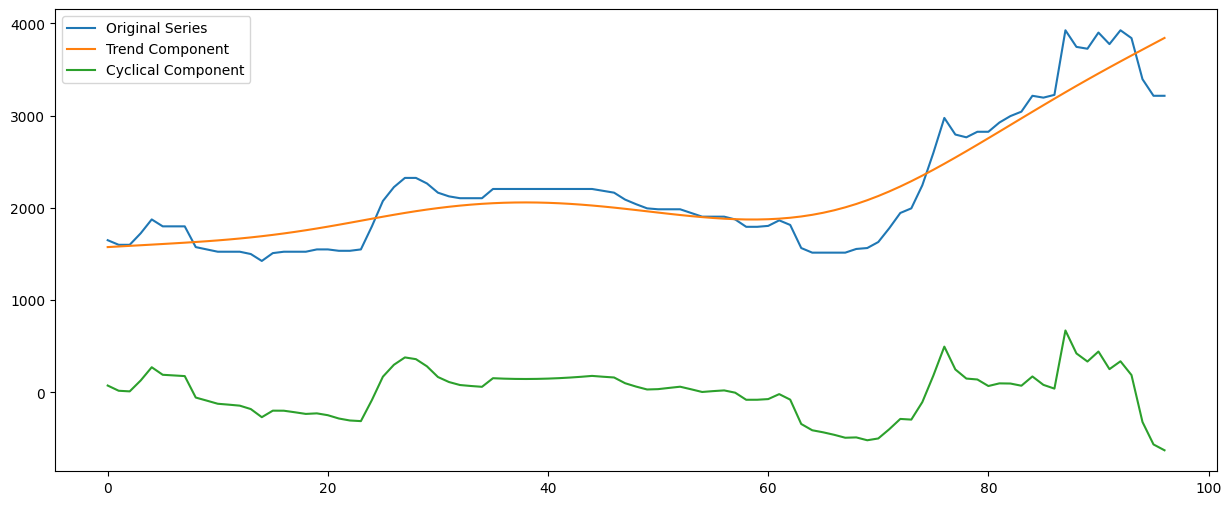

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(target_series, label='Original Series')
plt.plot(trend, label='Trend Component')
plt.plot(cycle, label='Cyclical Component')
plt.legend()
plt.show()